# Step 1: Load the modules we will need

In [1]:
#!/usr/bin/env python3
############################
#
# template by M Joyce
# for use with Smith College students
#
############################

## import the modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm

print("modules imported")

modules imported


# Step 2: Define a function to make figures look nice

In [2]:
def set_fig(ax):
    ax.tick_params(axis = 'both',which='both', width=2)
    ax.tick_params(axis = 'both',which='major', length=12)
    ax.tick_params(axis = 'both',which='minor', length=8, color='black')
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    return 

print("plot settings function defined")

plot settings function defined


# Step 3: Load the data

In [3]:
data_file = 'stellar_ages.dat'
Joyce_ages= np.loadtxt(data_file, usecols=(0), unpack = True)

print("ages loaded")

ages loaded


# Step 4: Create a Gaussian or "normal" distribution using norm.fit()
### the Gaussian is a function defined by two parameters: $\mu$ and $\sigma$. I have called these "Jmu" and "Jsigma" because they are the $\mu$ and $\sigma$ for a Gaussian fit to the "Joyce" ages. 
### note that we have imported "norm" from scipy.stats in Step 1

In [4]:
(Jmu, Jsigma) = norm.fit(Joyce_ages)

## you may print these quantities by uncommenting the line below
#print("Jmu: ", Jmu, "  Jsigma: ", Jsigma )

# Step 5: create a histogram of the ages

In [5]:
histogram = np.histogram(Joyce_ages)

## Now, grab the bins from the histogram we have created

In [6]:
bins = histogram[1]
## you may print the bins by uncommenting the line below
#print("bins: ", bins)

# Step 6: Create a curve defined by $\mu$, $\sigma$
### "pdf" in norm.pdf stands for "probability density function," and it is normalized such that its area is 1 by default

In [7]:
normalized_gaussian_pdf = norm.pdf(bins, Jmu, Jsigma)

## Now, rescale the curve so that it fits the size of our data. There are 91 age measurements, so len(Joyce_ages) = 91. We multiply our normalized Gaussian by this value

In [8]:
gaussian_pdf= normalized_gaussian_pdf*len(Joyce_ages)

# Step 7: Plot our histogram and the Gaussian curve we have fit to it

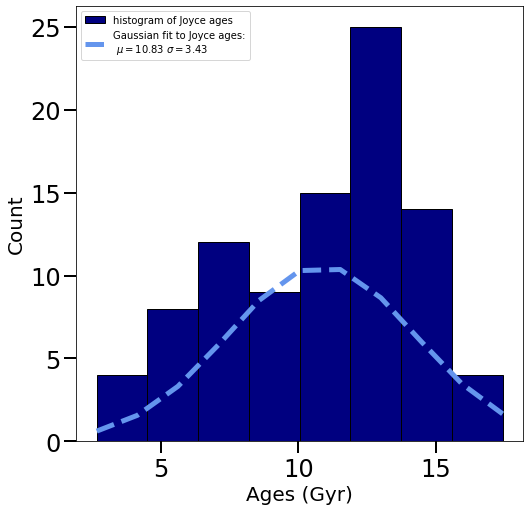

In [9]:
## initiate the figure
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)


## this is the histogram
plt.hist(Joyce_ages,  bins="auto", color='navy', edgecolor='black', label='histogram of Joyce ages')

## this is the Gaussian curve
plt.plot(bins, gaussian_pdf,\
         '--', color='cornflowerblue', linewidth=5,\
         label='Gaussian fit to Joyce ages:\n $\mu=$'+ "%.2f"%Jmu + ' $\sigma=$'+ "%.2f"%Jsigma )


## these lines are plot bookkeeping
plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

## Success!
### But, the histogram of the stellar age data does not look very much like a normal distribution.
### Perhaps we can make a better model to fit the data

# Step 8: Try a Kernel Density Estimate (KDE) instead
## Create the kde model for the stellar ages

In [10]:
kde_model = stats.gaussian_kde(Joyce_ages)

## to make the model smoother, we can increase the resolution of the x-axis
### the line below subdivides the age range into 1000 equally spaced values. The age range is the minimum age measurement, min(Joyce_ages), to the maximum age measurement, max(Joyce_ages). These correspond to about 2 Gyr (billion years) and 17 Gyr, respectively

In [11]:
age_x_values = np.linspace(min(Joyce_ages), max(Joyce_ages), 1000)

### the following line evaluates the kde_model function we made at the beginning of Step 8 over the smoother array of x values defined above. 

In [12]:
kde = kde_model(age_x_values)

## once again, the model is normalized to 1, so we must rescale it by the number of age measurements

In [13]:
## scale the kde by the number of stellar ages in our sample (91)
scaled_kde = kde*len(Joyce_ages)

# Step 9: Now, add our KDE model curve to the histogram plot from Step 7

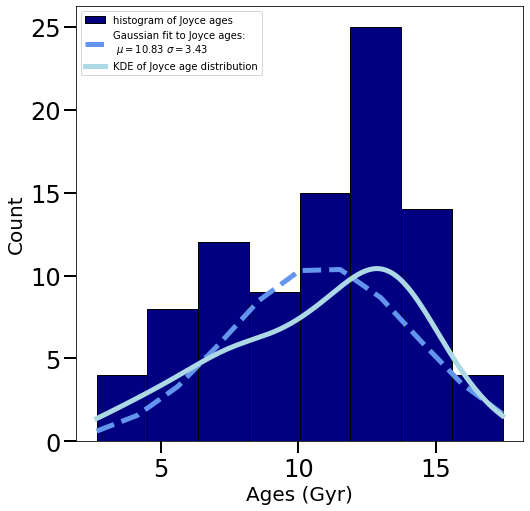

In [14]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram from earlier
plt.hist(Joyce_ages,  bins="auto", color= 'navy', edgecolor='black', label='histogram of Joyce ages')

## Gaussian fit from earlier
plt.plot(bins, gaussian_pdf,\
         '--', color='cornflowerblue', linewidth=5,\
         label='Gaussian fit to Joyce ages:\n $\mu=$'+ "%.2f"%Jmu + ' $\sigma=$'+ "%.2f"%Jsigma)

## NEW: add the KDE to the plot
plt.plot(age_x_values, scaled_kde,\
         linewidth=5, linestyle='-', color='lightblue',\
         label='KDE of Joyce age distribution')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

## That looks a lot better!

# EXERCISE 1
## Make a Gaussian for the other age measurements 
## stellar_ages.dat contains a second column. These are ages determined by another astronomer, named Bensby, and his team. We would like to see what their age distribution looks like. 

In [15]:
# Using the above as a template, generate
# a Gaussian fit to Bensby's age measurements

## we need to use DIFFERENT variable names than before 
## so we can plot the histograms on top of each other
Bensby_ages= np.loadtxt(data_file, usecols=(1), unpack = True)
(Bmu, Bsigma) = norm.fit(Bensby_ages)

B_histogram = np.histogram(Bensby_ages)
B_bins = B_histogram[1]

B_normalized_gaussian_pdf = norm.pdf(B_bins, Bmu, Bsigma)
B_gaussian_pdf= B_normalized_gaussian_pdf*len(Bensby_ages)

## Now, plot the histogram of Bensby data and the Gaussian curve, as in Step 7

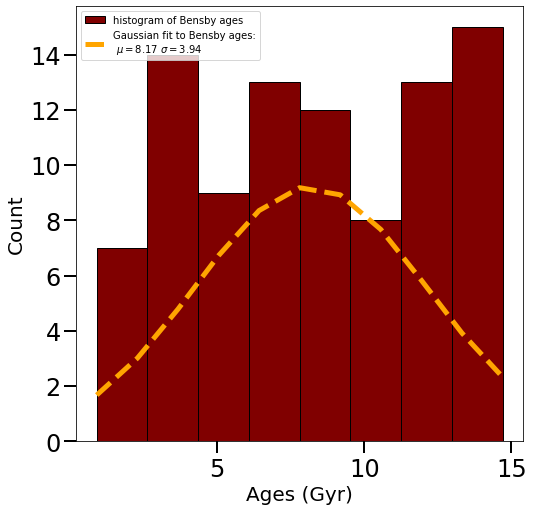

In [16]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)


plt.hist(Bensby_ages,  bins="auto", color='maroon', edgecolor='black', label='histogram of Bensby ages')

plt.plot(B_bins, B_gaussian_pdf,\
         '--', color='orange', linewidth=5,\
          label='Gaussian fit to Bensby ages:\n $\mu=$'+ "%.2f"%Bmu + ' $\sigma=$'+ "%.2f"%Bsigma)

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

 ## Now, make a KDE for Bensby's data

In [17]:
## make a new kde model for Bensby's data
B_kde_model = stats.gaussian_kde(Bensby_ages)

## resample the ages to make a smoother curve
B_age_x_values = np.linspace(min(Bensby_ages), max(Bensby_ages), 1000)
B_kde = B_kde_model(B_age_x_values)

## scale the kde by the number of stellar ages in our sample (91)
B_scaled_kde = B_kde*len(Bensby_ages)

## Add the KDE curve to Bensby histogram

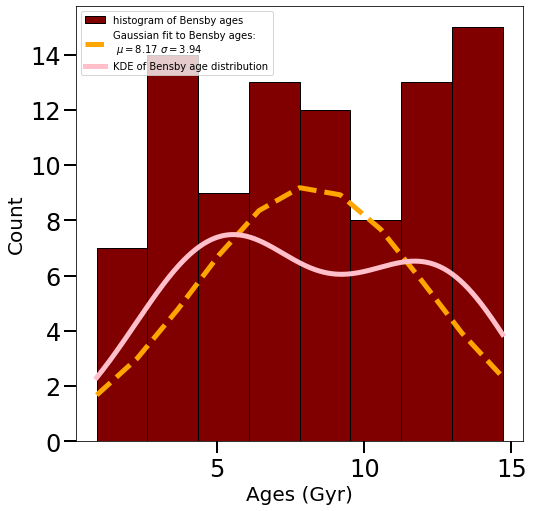

In [18]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram of Bensby ages
plt.hist(Bensby_ages,  bins="auto", color='maroon', edgecolor='black', label='histogram of Bensby ages')

## Gaussian fit to Bensby data
plt.plot(B_bins, B_gaussian_pdf,\
         '--', color='orange', linewidth=5,\
          label='Gaussian fit to Bensby ages:\n $\mu=$'+ "%.2f"%Bmu + ' $\sigma=$'+ "%.2f"%Bsigma)

## KDE fit to Bensby data
plt.plot(B_age_x_values, B_scaled_kde,\
         linewidth=5, linestyle='-', color='pink',\
         label='KDE of Bensby age distribution')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

# PART 2: KDE Resampling and Generative Models

In [19]:
## import the sklearn package
import sklearn

## import the KernelDensity model
from sklearn.neighbors import KernelDensity

## In this case, we will change the KDE _bandwidth_ parameter, usually called _h_. Start by defining a value for the bandwidth

In [20]:
h1 = 1

## create a new KDE for Joyce_ages using the sklearn KernelDensity function. The bandwidth parameter is set to bandwidth_value assigned above

In [21]:
kde1 = KernelDensity(bandwidth=h1).fit(Joyce_ages.reshape(-1, 1))

## We now have a function called "kde1" which represents Python's best guess for the pdf (probability density function) that describes Joyce_ages. 
## We now want to _sample_ this pdf to get a new _synthetic distribution_. We sample kde1 91 times to generate a synthetic distribution with the same number of ages as in the original data 

In [22]:
kde_model_1 = kde1.sample(91)

## Now, we plot our synthetic distribution, or _KDE Resampling_, on top of the Joyce age data 

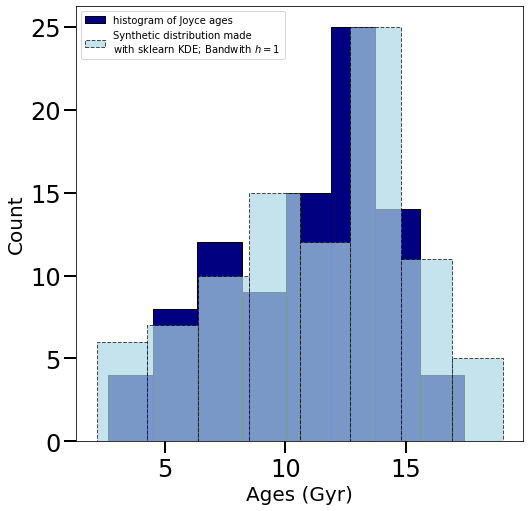

In [23]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram from earlier
plt.hist(Joyce_ages,  bins="auto", color= 'navy', edgecolor='black', label='histogram of Joyce ages') 

## NEW: add our new KDE resampled distribution with bandwidth h = 1
ax.hist(kde_model_1,\
        bins=8, density=False,\
        color='lightblue', alpha=0.7,\
        edgecolor='black', linestyle ='--',\
        label='Synthetic distribution made\n'+r'with sklearn KDE; Bandwith $h=1$')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)

plt.show()
plt.close()

# EXERCISE 2

## Repeat the above using two additional bandwidth values, _h_=0.1 and _h_ = 0.01.
## Visually, which of these bandwidths (_h_=1, _h_=0.1, _h_=0.01) provides the best reproduction of the original Joyce age histogram?

In [24]:
# recall that our first KDE resampling was done as follows:
#    h1 = 1
#    kde1 = KernelDensity(bandwidth=h1).fit(Joyce_ages.reshape(-1, 1))
#    kde_model_1 = kde1.sample(91)

h2 = 0.1
kde2 = KernelDensity(bandwidth=h2).fit(Joyce_ages.reshape(-1, 1))
kde_model_2 = kde2.sample(91)


h3 = 0.01
kde3 = KernelDensity(bandwidth=h3).fit(Joyce_ages.reshape(-1, 1))
kde_model_3 = kde3.sample(91)

## Plot the three synthetic distributions on top of the _truth_ (i.e. observed) Joyce age data

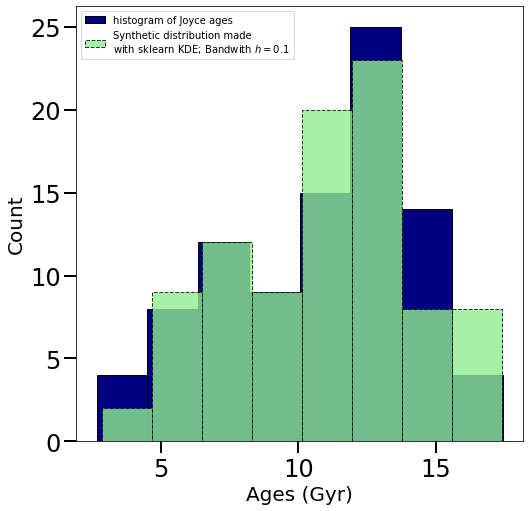

In [25]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## Joyce truth data 
plt.hist(Joyce_ages,  bins="auto", color= 'navy',edgecolor='black',  label='histogram of Joyce ages') 


## KDE resampled distribution with bandwidth h = 0.1
ax.hist(kde_model_2,\
        bins=8, density=False,\
        color='lightgreen', alpha=0.8,\
        edgecolor='black', linestyle ='--',\
        label='Synthetic distribution made\n'+r'with sklearn KDE; Bandwith $h=0.1$')


plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)

plt.show()
plt.close()

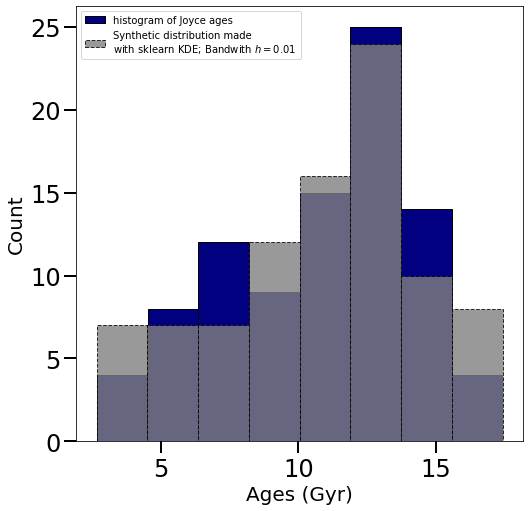

In [26]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## Joyce truth data 
plt.hist(Joyce_ages,  bins="auto", color= 'navy', edgecolor='black', label='histogram of Joyce ages') 


## KDE resampled distribution with bandwidth h = 0.01
ax.hist(kde_model_3,\
        bins=8, density=False,\
        color='grey', alpha=0.8,\
        edgecolor='black', linestyle ='--',\
        label='Synthetic distribution made\n'+r'with sklearn KDE; Bandwith $h=0.01$')


plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)

plt.show()
plt.close()

# ULTRA BONUS EXERCISE
## Make synthetic age distributions using a generative KDE based on Bensby's ages. 
## Visually, decide an appropriate value for the bandwidth parameter in this case

In [27]:
## Bensby-based KDE model with h = 1
B_h1 = 1
B_kde1 = KernelDensity(bandwidth=B_h1).fit(Bensby_ages.reshape(-1, 1))
B_kde_model_1 = B_kde1.sample(91)

## Bensby-based KDE model with h = 0.1
B_h2 = 0.1
B_kde2 = KernelDensity(bandwidth=B_h2).fit(Bensby_ages.reshape(-1, 1))
B_kde_model_2 = B_kde2.sample(91)

## Bensby-based KDE model with h = 0.01
B_h3 = 0.01
B_kde3 = KernelDensity(bandwidth=B_h3).fit(Bensby_ages.reshape(-1, 1))
B_kde_model_3 = B_kde3.sample(91)

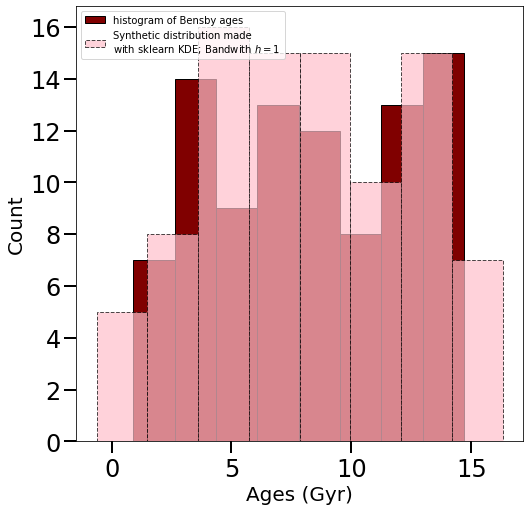

In [28]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram from earlier
plt.hist(Bensby_ages,  bins="auto", color= 'maroon',edgecolor='black',  label='histogram of Bensby ages') 

## KDE resampled distribution with bandwidth h = 1
ax.hist(B_kde_model_1,\
        bins=8, density=False,\
        color='pink', alpha=0.7,\
        edgecolor='black', linestyle ='--',\
        label='Synthetic distribution made\n'+r'with sklearn KDE; Bandwith $h=1$')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

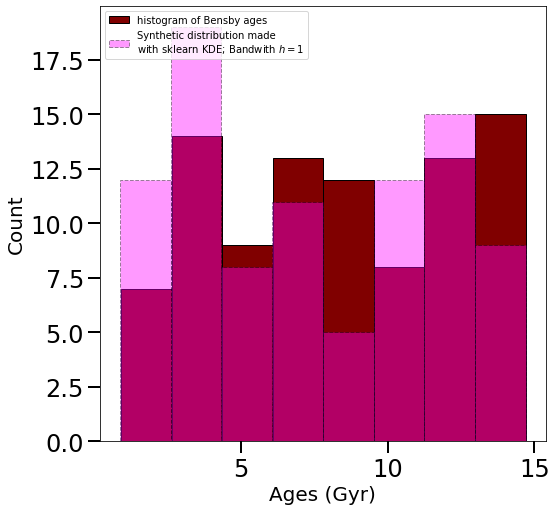

In [29]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram from earlier
plt.hist(Bensby_ages,  bins="auto", color= 'maroon',\
         edgecolor='black', label='histogram of Bensby ages') 

## KDE resampled distribution with bandwidth h = 1
ax.hist(B_kde_model_2,\
        bins=8, density=False,\
        color='magenta', alpha=0.4,\
        edgecolor='black', linestyle ='--',\
        label='Synthetic distribution made\n'+r'with sklearn KDE; Bandwith $h=1$')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

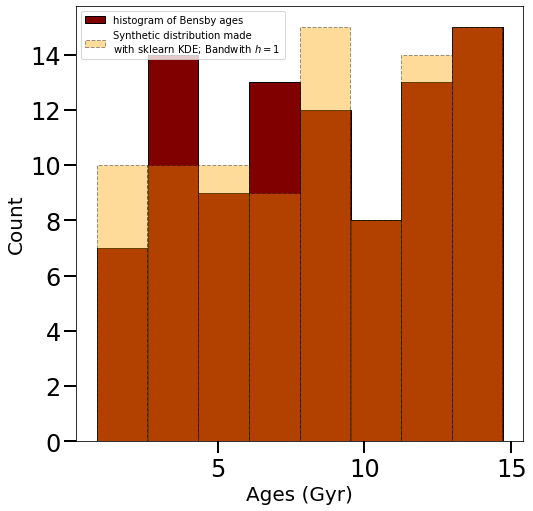

In [30]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram from earlier
plt.hist(Bensby_ages,  bins="auto", color= 'maroon',\
         edgecolor='black', label='histogram of Bensby ages') 

## KDE resampled distribution with bandwidth h = 1
plt.hist(B_kde_model_3,\
        bins=8, density=False,\
        color='orange', alpha=0.4,
        edgecolor='black', linestyle='--', 
        label='Synthetic distribution made\n'+r'with sklearn KDE; Bandwith $h=1$')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()